In [54]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

import matplotlib.pyplot as plt

import nets
import pipeline
import importlib
importlib.reload(pipeline)
importlib.reload(nets)

<module 'nets' from '/content/nets.py'>

In [41]:
start_width = 1
end_width = 10
train_size = 5000
test_size = 5000
epochs = 800

models = {}
for i in range(start_width, end_width + 1):
  models[i] = pipeline.CifarModel()
  models[i].load_net(nets.CNN(c = i))
  models[i].load_data(train_size = train_size, test_size = test_size)

Loading CIFAR10 from torchvision: 512 train, 512 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 512 train, 512 test.
Files already downloaded and verified
Files already downloaded and verified
Loading CIFAR10 from torchvision: 512 train, 512 test.
Files already downloaded and verified
Files already downloaded and verified


In [42]:
for model in models.values():
  model.train(nn.CrossEntropyLoss(), epochs = epochs)

[0] loss: 2.902
[5] loss: 13.947
[10] loss: 13.318
[15] loss: 12.960
[20] loss: 12.526
[25] loss: 12.285
[30] loss: 12.115
[35] loss: 11.885
[40] loss: 11.801
[45] loss: 11.664
[50] loss: 11.597
[55] loss: 11.445
[60] loss: 11.480
[65] loss: 11.401
[70] loss: 11.330
[75] loss: 11.330
[80] loss: 11.277
[85] loss: 11.259
[90] loss: 11.204
[95] loss: 11.174
[100] loss: 11.163
[105] loss: 11.088
[110] loss: 11.074
[115] loss: 11.049
[120] loss: 11.013
[125] loss: 10.987
[130] loss: 10.944
[135] loss: 10.912
[140] loss: 10.871
[145] loss: 10.839
[150] loss: 10.822
[155] loss: 10.767
[160] loss: 10.764
[165] loss: 10.676
[170] loss: 10.666
[175] loss: 10.653
[180] loss: 10.576
[185] loss: 10.588
[190] loss: 10.553
[195] loss: 10.499
[200] loss: 10.517
[205] loss: 10.419
[210] loss: 10.413
[215] loss: 10.418
[220] loss: 10.392
[225] loss: 10.329
[230] loss: 10.314
[235] loss: 10.281
[240] loss: 10.227
[245] loss: 10.201
[250] loss: 10.201
[255] loss: 10.154
[260] loss: 10.104
[265] loss: 10.1

In [55]:
widths = list(models.keys())
train_errors = [models[key].train_error() for key in widths]
test_errors = [models[key].test_error() for key in widths]
aucs = [models[key].auc(big = True) for key in widths]
print(widths)
print(train_errors)
print(test_errors)
print(aucs)

[1, 2, 3]
[0.287109375, 0.474609375, 0.591796875]
[0.2734375, 0.29296875, 0.376953125]
[0.4809989929199219, 0.5315170288085938, 0.5112876892089844]


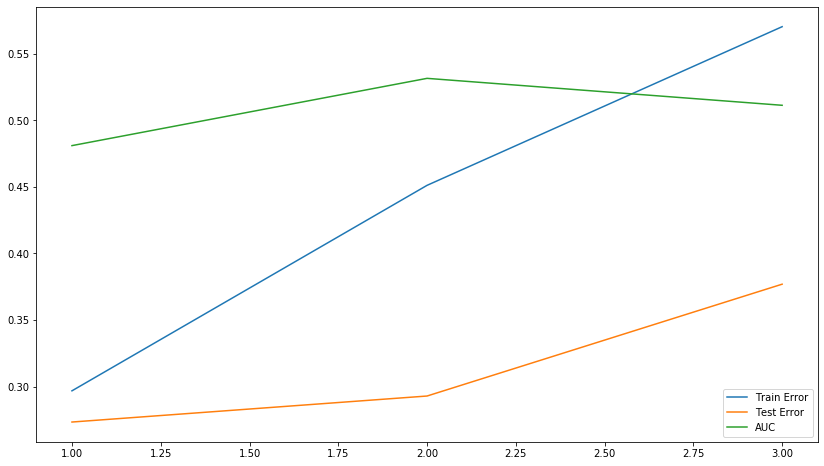

In [53]:
plt.figure(figsize=(14,8))
plt.plot(widths, train_errors, label = 'Train Error')
plt.plot(widths, test_errors, label = 'Test Error')
plt.plot(widths, aucs, label = 'AUC')
plt.legend(loc = 'lower right')
plt.show()